In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

L:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [55]:
X_ = pd.read_csv('Data/X_final.csv')
Y = pd.read_csv('Data/Y_final.csv')

In [56]:
X_.columns

Index(['NO_QR', 'MONTH', 'MONTH_NAME', 'CENTROID Y', 'CENTROID X',
       'nb_logements', 'prop_log_sociaux', 'NB_EXTERMINATIONS',
       'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3', 'NB_EXTERMINATIONS_4',
       'id_week', 'MEAN_TEMPERATURE', 'MIN_TEMPERATURE', 'MAX_TEMPERATURE',
       'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW', 'DIRECTION_MAX_GUST',
       'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS', 'HEATING_DEGREE_DAYS',
       'nb_j_t_sup20_1w', 'nb_j_t_sup25_1w', 'nb_j_t_sup30_1w',
       'nb_j_t_inf_10_1w', 'nb_j_t_inf_0_1w', 'nb_jt__inf_m5_1w',
       'nb_j_t_inf_m10_1w', 'nb_j_precip_sup_5_1w', 'mean_t_4w', 'min_t_4w',
       'max_t_4w', 'tot_precip_4w', 'tot_rain_4w', 'tot_snow_4w',
       'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w', 'mean_t_3w', 'min_t_3w',
       'max_t_3w', 'tot_precip_3w', 'tot_rain_3w', 'tot_snow_3w',
       'nb_j_t_sup20

In [57]:
#normalize position
#X_['CENTROID X'] = (X_['CENTROID X']-X_['CENTROID X'].mean())/X_['CENTROID X'].std()
#X_['CENTROID Y'] = (X_['CENTROID Y']-X_['CENTROID Y'].mean())/X_['CENTROID Y'].std()

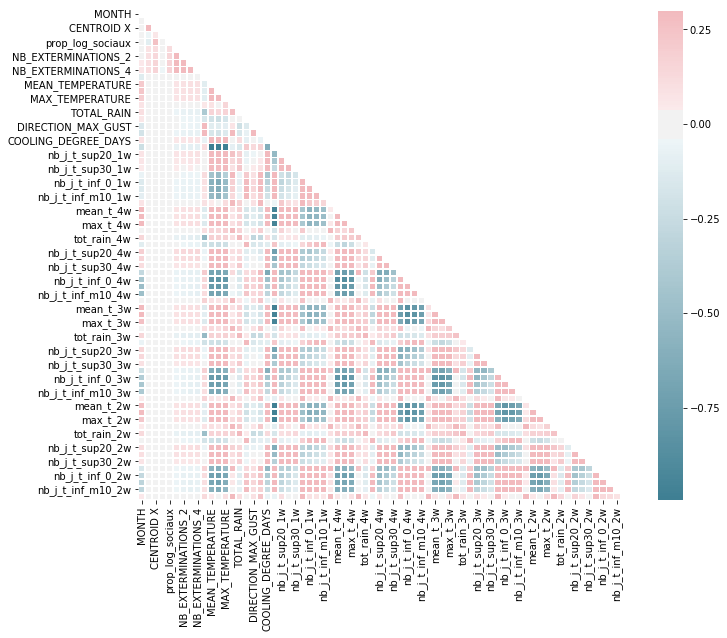

In [58]:
corr = X_.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

In [59]:
X_.columns

Index(['NO_QR', 'MONTH', 'MONTH_NAME', 'CENTROID Y', 'CENTROID X',
       'nb_logements', 'prop_log_sociaux', 'NB_EXTERMINATIONS',
       'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3', 'NB_EXTERMINATIONS_4',
       'id_week', 'MEAN_TEMPERATURE', 'MIN_TEMPERATURE', 'MAX_TEMPERATURE',
       'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW', 'DIRECTION_MAX_GUST',
       'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS', 'HEATING_DEGREE_DAYS',
       'nb_j_t_sup20_1w', 'nb_j_t_sup25_1w', 'nb_j_t_sup30_1w',
       'nb_j_t_inf_10_1w', 'nb_j_t_inf_0_1w', 'nb_jt__inf_m5_1w',
       'nb_j_t_inf_m10_1w', 'nb_j_precip_sup_5_1w', 'mean_t_4w', 'min_t_4w',
       'max_t_4w', 'tot_precip_4w', 'tot_rain_4w', 'tot_snow_4w',
       'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w', 'mean_t_3w', 'min_t_3w',
       'max_t_3w', 'tot_precip_3w', 'tot_rain_3w', 'tot_snow_3w',
       'nb_j_t_sup20

In [60]:
feats = ['mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w',
       'min_t_4w.1']
for feat in feats:
    prefix = feat[:-2]
    for i in range(2, 4):
        diff_feat = 'diff_'+ prefix + str(i+1) + str(i) + 'w'
        if (prefix + str(i+1)+'w') in X_.columns and (prefix + str(i)+'w') in X_.columns:
            X_[diff_feat] =  X_[prefix + str(i+1)+'w'] -  X_[prefix + str(i)+'w']

In [61]:
X_.columns

Index(['NO_QR', 'MONTH', 'MONTH_NAME', 'CENTROID Y', 'CENTROID X',
       'nb_logements', 'prop_log_sociaux', 'NB_EXTERMINATIONS',
       'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3', 'NB_EXTERMINATIONS_4',
       'id_week', 'MEAN_TEMPERATURE', 'MIN_TEMPERATURE', 'MAX_TEMPERATURE',
       'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW', 'DIRECTION_MAX_GUST',
       'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS', 'HEATING_DEGREE_DAYS',
       'nb_j_t_sup20_1w', 'nb_j_t_sup25_1w', 'nb_j_t_sup30_1w',
       'nb_j_t_inf_10_1w', 'nb_j_t_inf_0_1w', 'nb_jt__inf_m5_1w',
       'nb_j_t_inf_m10_1w', 'nb_j_precip_sup_5_1w', 'mean_t_4w', 'min_t_4w',
       'max_t_4w', 'tot_precip_4w', 'tot_rain_4w', 'tot_snow_4w',
       'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w', 'mean_t_3w', 'min_t_3w',
       'max_t_3w', 'tot_precip_3w', 'tot_rain_3w', 'tot_snow_3w',
       'nb_j_t_sup20

In [62]:
#Y['LABEL_unnorm1mois'] = Y['LABEL_1mois']*X_['nb_logements']
#Y['LABEL_unnorm3mois'] = Y['LABEL_3mois']*X_['nb_logements']

In [63]:
#select subset of features to keep
to_keep = ['CENTROID Y', 'CENTROID X', 'nb_logements', 'prop_log_sociaux',
        'MEAN_TEMPERATURE', 'MIN_TEMPERATURE',#'NB_EXTERMINATIONS_4',
       'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW',
       'DIRECTION_MAX_GUST', 'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS',
      # 'HEATING_DEGREE_DAYS',
       'mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w',
       'min_t_4w.1']

to_keep_w_exterm = ['CENTROID Y', 'CENTROID X', 'nb_logements', 'prop_log_sociaux',
        'MEAN_TEMPERATURE', 'MIN_TEMPERATURE','NB_EXTERMINATIONS', 'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3',
       'NB_EXTERMINATIONS_4',
       'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'TOTAL_RAIN', 'TOTAL_SNOW',
       'DIRECTION_MAX_GUST', 'SPEED_MAX_GUST', 'COOLING_DEGREE_DAYS',
      # 'HEATING_DEGREE_DAYS',
       'mean_t_4w', 'min_t_4w', 'max_t_4w', 'tot_precip_4w', 'tot_rain_4w',
       'tot_snow_4w', 'nb_j_t_sup20_4w', 'nb_j_t_sup25_4w', 'nb_j_t_sup30_4w',
       'nb_j_t_inf_10_4w', 'nb_j_t_inf_0_4w', 'nb_jt__inf_m5_4w',
       'nb_j_t_inf_m10_4w', 'nb_j_precip_sup_5_4w',
       'min_t_4w.1']


In [64]:
X = X_[to_keep]
X_w = X_[to_keep_w_exterm]

In [65]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [66]:
X_train_w, X_test_w, y_train_w, y_test_w= train_test_split( X_w, Y, test_size=0.2, random_state=42)

In [67]:
X_train_all, X_test_all, y_train_all, y_test_all= train_test_split( X_, Y, test_size=0.2, random_state=42)

# Baseline 

In [30]:
X_base =X_[['CENTROID Y', 'CENTROID X', 
       'NB_EXTERMINATIONS', 'NB_EXTERMINATIONS_2', 'NB_EXTERMINATIONS_3',
       'NB_EXTERMINATIONS_4']]
X_trainbase, X_testbase, y_trainbase, y_testbase = train_test_split( X_base, Y, test_size=0.2, random_state=42)

In [31]:

reg = LinearRegression()
reg.fit(X_trainbase, y_trainbase) 
pred = reg.predict(X_testbase)

r2_score(y_testbase, pred, multioutput= 'raw_values')

array([0.4839472 , 0.41787284])

In [32]:
reg = RandomForestRegressor()
reg.fit(X_trainbase, y_trainbase) 
pred = reg.predict(X_testbase)

r2_score(y_testbase, pred, multioutput= 'raw_values')

array([0.58639016, 0.55854676])

# Try different models

In [33]:

reg = LinearRegression()
reg.fit(X_train, y_train) 
pred = reg.predict(X_test)

r2_score(y_test, pred, multioutput= 'raw_values')

array([0.16642379, 0.2031299 ])

# Random forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) 

pred = rf_reg.predict(X_test)
r2_score(y_test, pred, multioutput= 'raw_values')

array([0.57795128, 0.71624192])

In [35]:
#get feature importances
list_feats = X.columns.tolist()
feats_imp = rf_reg.feature_importances_

dict_imp = {}

for (i, elem) in enumerate(list_feats):
    dict_imp[elem] = feats_imp[i]

sorted_imp = sorted(dict_imp.items(), key=lambda kv: kv[1], reverse = True)
sorted_imp[:10]

[('prop_log_sociaux', 0.21251983563004848),
 ('nb_logements', 0.15202902408264848),
 ('CENTROID Y', 0.13116448410942153),
 ('nb_j_t_sup20_4w', 0.05315502812447622),
 ('CENTROID X', 0.052594482818637475),
 ('SPEED_MAX_GUST', 0.047447339376621434),
 ('nb_j_t_inf_10_4w', 0.02897744365604374),
 ('DIRECTION_MAX_GUST', 0.02875310007634464),
 ('max_t_4w', 0.02776387135263164),
 ('min_t_4w', 0.026176916765536302)]

In [36]:
#try with added features of past bedbugs events
rf_reg_w = RandomForestRegressor()
rf_reg_w.fit(X_train_w, y_train_w) 

pred_w = rf_reg_w.predict(X_test_w)
r2_score(y_test_w, pred_w, multioutput= 'raw_values')

array([0.66154904, 0.70128581])

In [37]:
#get feature importances
list_feats = X_train_w.columns.tolist()
feats_imp = rf_reg_w.feature_importances_

dict_imp = {}

for (i, elem) in enumerate(list_feats):
    dict_imp[elem] = feats_imp[i]

sorted_imp = sorted(dict_imp.items(), key=lambda kv: kv[1], reverse = True)
sorted_imp[:10]

[('NB_EXTERMINATIONS_4', 0.4039171092812829),
 ('nb_logements', 0.18252519652180757),
 ('NB_EXTERMINATIONS', 0.03950628643064395),
 ('prop_log_sociaux', 0.039009405881602746),
 ('CENTROID Y', 0.036952976665180395),
 ('NB_EXTERMINATIONS_3', 0.03547977747369867),
 ('SPEED_MAX_GUST', 0.021165954902350587),
 ('CENTROID X', 0.020967788392514834),
 ('nb_j_precip_sup_5_4w', 0.018161033429480455),
 ('NB_EXTERMINATIONS_2', 0.015506409169140947)]

In [38]:
# try all features
rf_reg_all = RandomForestRegressor()
rf_reg_all.fit(X_train_all, y_train_all) 

pred_all = rf_reg_all.predict(X_test_all)
r2_score(y_test_all, pred_all, multioutput= 'raw_values')


ValueError: could not convert string to float: '60C'

In [27]:
#get feature importances
list_feats = X_train_all.columns.tolist()
feats_imp = rf_reg_all.feature_importances_

dict_imp = {}

for (i, elem) in enumerate(list_feats):
    dict_imp[elem] = feats_imp[i]

sorted_imp = sorted(dict_imp.items(), key=lambda kv: kv[1], reverse = True)
sorted_imp[:10]

[('NB_EXTERMINATIONS_4', 0.3984194218089562),
 ('nb_logements', 0.1828742101446746),
 ('id_week', 0.05731142745023628),
 ('CENTROID Y', 0.037836461413441644),
 ('prop_log_sociaux', 0.03324056613759737),
 ('NB_EXTERMINATIONS', 0.03080253579293189),
 ('NB_EXTERMINATIONS_3', 0.029858144775445867),
 ('CENTROID X', 0.021463460525518927),
 ('NB_EXTERMINATIONS_2', 0.017625412945395793),
 ('nb_j_t_sup20_2w', 0.008298249830799317)]

In [32]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train['LABEL_3mois']) 

pred = reg.predict(X_test)
print(r2_score(y_test[ 'LABEL_3mois'], pred))

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train['LABEL_unnorm1mois']) 

pred = reg.predict(X_test)
print(r2_score(y_test[ 'LABEL_unnorm1mois'], pred))

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train['LABEL_unnorm3mois']) 

pred = reg.predict(X_test)
print(r2_score(y_test[ 'LABEL_unnorm3mois'], pred))

0.5107480136599706
0.48617654899115703
0.605751700367898


In [33]:
reg = GradientBoostingRegressor()
reg.fit(X_train_w, y_train_w['LABEL_3mois']) 

pred = reg.predict(X_test_w)
print(r2_score(y_test_w[ 'LABEL_3mois'], pred))

reg = GradientBoostingRegressor()
reg.fit(X_train_w, y_train_w['LABEL_unnorm1mois']) 

pred = reg.predict(X_test_w)
print(r2_score(y_test_w[ 'LABEL_unnorm1mois'], pred))

reg = GradientBoostingRegressor()
reg.fit(X_train_w, y_train_w['LABEL_unnorm3mois']) 

pred = reg.predict(X_test_w)
print(r2_score(y_test_w[ 'LABEL_unnorm3mois'], pred))

0.6658989402350719
0.6838519924517618
0.7164878262165276


In [34]:
list_feats = X.columns.tolist()
feats_imp = reg.feature_importances_

dict_imp = {}

for (i, elem) in enumerate(list_feats):
    dict_imp[elem] = feats_imp[i]

sorted_imp = sorted(dict_imp.items(), key=lambda kv: kv[1])
sorted_imp

[('tot_precip_4w', 0.0012387279142414245),
 ('SPEED_MAX_GUST', 0.0035950962150952366),
 ('mean_t_4w', 0.004028353231363786),
 ('MIN_TEMPERATURE', 0.005766148594735814),
 ('nb_j_t_sup25_4w', 0.006181629323221683),
 ('nb_j_t_sup20_4w', 0.008173946996489864),
 ('min_t_4w', 0.009048113600408886),
 ('tot_rain_4w', 0.009297355901864807),
 ('min_t_4w.1', 0.009317065700387664),
 ('MEAN_TEMPERATURE', 0.010100866133341763),
 ('nb_j_t_sup30_4w', 0.012375866580823326),
 ('COOLING_DEGREE_DAYS', 0.01261027250843238),
 ('DIRECTION_MAX_GUST', 0.013593645347232858),
 ('nb_j_t_inf_m10_4w', 0.015336390800266936),
 ('nb_j_t_inf_10_4w', 0.01576179750659032),
 ('max_t_4w', 0.017563268854185375),
 ('tot_snow_4w', 0.01798925766636787),
 ('TOTAL_PRECIPITATION', 0.01914179696278315),
 ('nb_jt__inf_m5_4w', 0.020691657424739645),
 ('nb_j_t_inf_0_4w', 0.026978527685792886),
 ('nb_j_precip_sup_5_4w', 0.033033498191911974),
 ('TOTAL_RAIN', 0.05316416238724435),
 ('MAX_TEMPERATURE', 0.05861378639472524),
 ('CENTROID 

# Categories classification

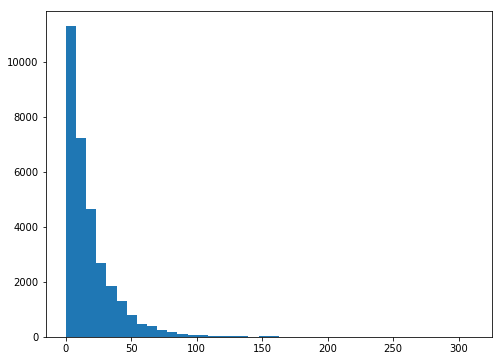

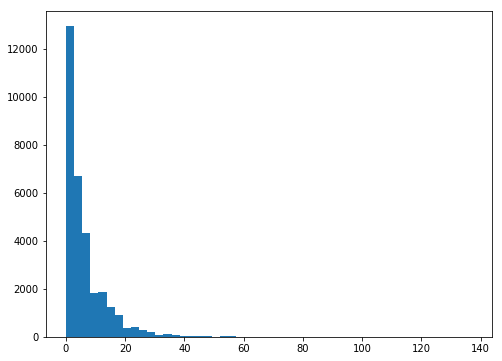

In [39]:
plt.figure(figsize=(8,6))
plt.hist(Y['LABEL_3mois'], bins=40)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(Y['LABEL_1mois'], bins=50)
plt.show()

In [40]:
# categories for 3m
y = Y['LABEL_3mois']
categories_3m = (y < 15)*1 + (y >= 15)*(y < 25)*2 + (y >= 25)*(y < 40)*3 + (y >= 40)*(y < 60)*4 + (y >= 60)*5
onehot_y_3m = pd.get_dummies(categories_3m, prefix = 'category')

# categories for 1m
y = Y['LABEL_1mois']
categories_3m = (y < 3)*1 + (y >= 3)*(y < 7)*2 + (y >= 7)*(y < 13)*3 + (y >= 13)*(y < 21)*4 + (y >= 21)*5
onehot_y_1m = pd.get_dummies(categories_3m, prefix = 'category')

L:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
L:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
L:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
L:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupp

In [68]:
#one hot encode
dumdum = pd.get_dummies(X_['NO_QR'], prefix = 'category_qr')
dumdumdum = pd.get_dummies(X_['MONTH'], prefix = 'category_month')
X_ = pd.concat([X_, dumdum, dumdumdum], axis=1)

In [69]:
X_final = X_[X_.columns[3:]]

In [77]:
X_final_train = X_final[:21493]
y_1m_train = onehot_y_1m[:21493]
y_3m_train = onehot_y_3m[:21493]

X_final_test = X_final[21493:]
y_1m_test = onehot_y_1m[21493:]
y_3m_test = onehot_y_3m[21493:]

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

clf = RandomForestClassifier()
clf.fit(X_final_train, categories_3m[:21493])
#print(clf.feature_importances_)
y_predict_3m = clf.predict(X_final_test)
print(f1_score(categories_3m[21493:], y_predict_3m, average=None))
print(accuracy_score(categories_3m[21493:], y_predict_3m))
print(precision_score(categories_3m[21493:], y_predict_3m, average=None))
print(recall_score(categories_3m[21493:], y_predict_3m, average=None))

[0.73433095 0.38616608 0.35270192 0.32106038 0.47635727]
0.5391
[0.71813362 0.37459634 0.36369083 0.3885918  0.50746269]
[0.75127579 0.39847328 0.34235759 0.27352572 0.44884488]
